# MODIS

In [1]:
#Import classes for reading MODIS data
from modis_data import MODISFinder, MODISReader

In [2]:
#Find all the files in head_loc and create a sqlite virtual database
mf = MODISFinder(2015, head_loc="/media/Data/modis")
mf.create_virtual_data(location = "/media/Data/modis/virtualData")

#Read the virtual database and retrieve data in format required by OPTIRAD EO-LDAS
mr = MODISReader(2015, head_loc="/media/Data/modis/virtualData")
(doys, rho, sza, vza, raa, saa, vaa, qa, qa_passer) = mr.grab_all_data()

/media/Data/modis/virtualData/SolarZenith_2015.vrt
/media/Data/modis/virtualData/SolarAzimuth_2015.vrt
/media/Data/modis/virtualData/SensorZenith_2015.vrt
/media/Data/modis/virtualData/SensorAzimuth_2015.vrt
/media/Data/modis/virtualData/statekm_2015.vrt
/media/Data/modis/virtualData/brdf_2015_b01.vrt
/media/Data/modis/virtualData/brdf_2015_b02.vrt
/media/Data/modis/virtualData/brdf_2015_b03.vrt
/media/Data/modis/virtualData/brdf_2015_b04.vrt
/media/Data/modis/virtualData/brdf_2015_b05.vrt
/media/Data/modis/virtualData/brdf_2015_b06.vrt
/media/Data/modis/virtualData/brdf_2015_b07.vrt
Read reflectance band 1
Read reflectance band 2
Read reflectance band 3
Read reflectance band 4
Read reflectance band 5
Read reflectance band 6
Read reflectance band 7
Read SolarZenith band
Read SolarAzimuth band
Read SensorZenith band
Read SensorAzimuth band
Read statekm band


In [3]:
# Five sample points read from file opened in BEAM
# pixels = [[band, column, row], ...]
pixels=[[0, 1441, 533],[0, 763,929],[0, 309,1623], [0, 2334,2352],[0, 1944,216]]
surfreflectance = [7.392e7,9.596e7, 7760000, 7060000, 5290000]

In [4]:
print rho[0,1441,533]

681


In [5]:
# Compare the values read from BEAM to those in array.
# The vaues in the original MODIS files are scaled by a factor of 10000
# this scaling has already been applied to the output array.
scaling =10000
print "Scale factor = ", 10000
print "Band,  row, column | Value in BEAM | Array value | equal (after scaling)?"
for pos, valBEAM in zip(pixels, surfreflectance):
    valarray = rho[pos[0], pos[2], pos[1]]
    print "{:^4}, {:>4}, {:^7}|{:>14} | {:>11} | {}".format(
            pos[0], pos[2], pos[1], valBEAM, valarray, (valBEAM/scaling==valarray))


Scale factor =  10000
Band,  row, column | Value in BEAM | Array value | equal (after scaling)?
 0  ,  533,  1441  |    73920000.0 |        7392 | True
 0  ,  929,   763  |    95960000.0 |        9596 | True
 0  , 1623,   309  |       7760000 |         776 | True
 0  , 2352,  2334  |       7060000 |         706 | True
 0  ,  216,  1944  |       5290000 |         529 | True


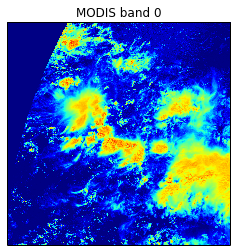

In [6]:
# Imports for plotting.
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the arrays for each band.
plt.imshow (rho[0], interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('MODIS band 0')